#### Contorno de formas

O OpenCV tem diversas funções prontas para buscarmos encontrar curvas de contorno em cada forma, permitindo que a gente separe as formas dentro da imagem. Ele faz isso tentando tentando juntar os bontos na borda das imagems.

De acordo com a documentação do OpenCV:

- O ideal é usar imagens binárias, para melhorar a acurácia.

- O trabalho feito é semelhante a achar um objeto branco em um background preto. Então o objeto a ser encontrado deve ser branco, e o fundo preto.

In [ ]:
#!pip install imutils

In [1]:
# Importando o OpenCV
import cv2

# Importando bibliotecas auxiliares
import numpy as np
import matplotlib.pyplot as plt

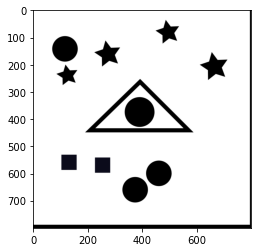

In [2]:
img = cv2.imread('./desenho.png')

plt.imshow(img)
plt.show()

In [3]:
img.shape

(800, 800, 3)

Como o ideal é termos imagens binárias, vamos transformar tudo para escala de cinza.

In [4]:
def exibe_image(img, gray=True):
    
    if gray:
        plt.imshow(img, cmap = 'gray')
    else:
        plt.imshow(img)
    
    plt.axis('off')
    plt.show()

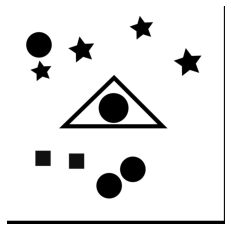

In [5]:
# Faça aqui a conversão.
# Além disso, como o algoritmo encontra formas brancas em um fundo preto, inverta as cores. Lembra como faz?
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
exibe_image(img_gray)

In [6]:
result = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
#exibe_image(img_thr)

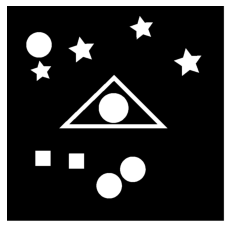

In [7]:
_, img_thr = result
exibe_image(img_thr)

In [8]:
print(img_thr)

[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


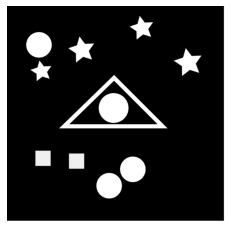

In [9]:
img_inv = cv2.bitwise_not(img_gray)
exibe_image(img_inv)

In [10]:
# Para pegarmos os contornos, usamos a função "findContours"
contours, hierarchy = cv2.findContours(img_thr, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# Parâmetros:
# img_inv Imagem de onde pegamos os contornos
# cv2.RETR_LIST pegamos uma lista de todos os contornos
# cv2.CHAIN_APPROX_SIMPLE método para encontrar o contorno

In [11]:
# Os contornos são basicamente uma sequência de pontos montando a curva.
contours[0]

array([[[366, 613]],

       [[365, 614]],

       [[362, 614]],

       [[361, 615]],

       [[359, 615]],

       [[358, 616]],

       [[356, 616]],

       [[355, 617]],

       [[354, 617]],

       [[353, 618]],

       [[352, 618]],

       [[350, 620]],

       [[349, 620]],

       [[347, 622]],

       [[346, 622]],

       [[337, 631]],

       [[337, 632]],

       [[335, 634]],

       [[335, 635]],

       [[334, 636]],

       [[334, 637]],

       [[333, 638]],

       [[333, 639]],

       [[332, 640]],

       [[332, 641]],

       [[331, 642]],

       [[331, 644]],

       [[330, 645]],

       [[330, 647]],

       [[329, 648]],

       [[329, 652]],

       [[328, 653]],

       [[328, 665]],

       [[329, 666]],

       [[329, 670]],

       [[330, 671]],

       [[330, 673]],

       [[331, 674]],

       [[331, 676]],

       [[332, 677]],

       [[332, 678]],

       [[333, 679]],

       [[333, 680]],

       [[334, 681]],

       [[334, 682]],

       [[3

In [12]:
# Podemos ver as áreas de cada contorno
for n, cont in enumerate(contours):
    print(f"Área do contorno {n}: {cv2.contourArea(cont)}")

Área do contorno 0: 6760.0
Área do contorno 1: 6760.5
Área do contorno 2: 3024.5
Área do contorno 3: 3025.0
Área do contorno 4: 9238.5
Área do contorno 5: 26200.0
Área do contorno 6: 38687.0
Área do contorno 7: 2289.5
Área do contorno 8: 4200.5
Área do contorno 9: 3631.0
Área do contorno 10: 6756.0
Área do contorno 11: 3002.5
Área do contorno 12: 11153.5


Os contornos no OpenCV têm uma hierarquia, indo do mais externo (parente), para os que se encontram dentro dele (filhos).

In [13]:
# https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html

# Na hierarquia, a ordem das informações é:
# [NEXT, PREVIOUS, PRIMEIRO FILHO, PARENTE]
# NEXT: próximo contorno no mesmo nível
# PREVIOUS: contorno anterior no mesmo nível
# PRIMEIRO FILHO: contorno abaixo (filho)
# PARENTE: contorno acima (parente)
print(hierarchy)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [-1 11 -1 -1]]]


In [14]:
contours[0].shape

(128, 1, 2)

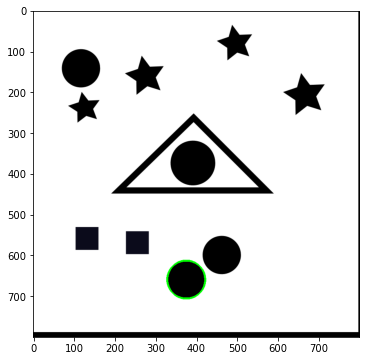

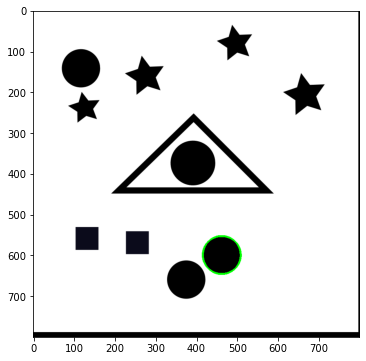

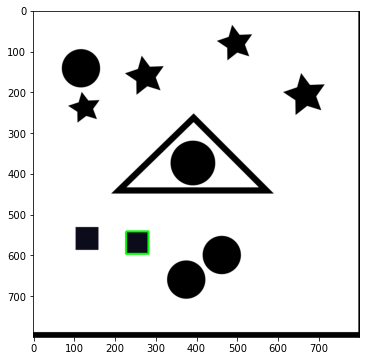

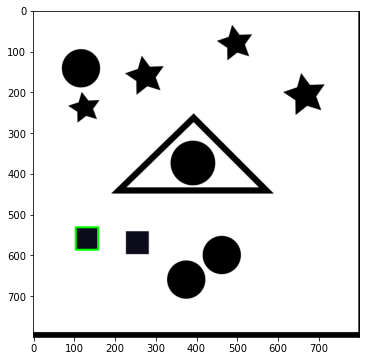

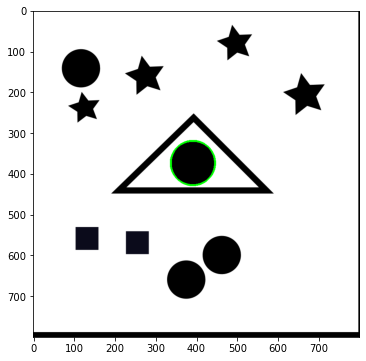

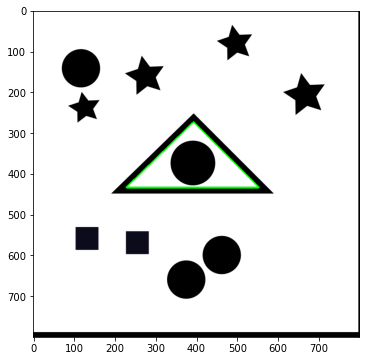

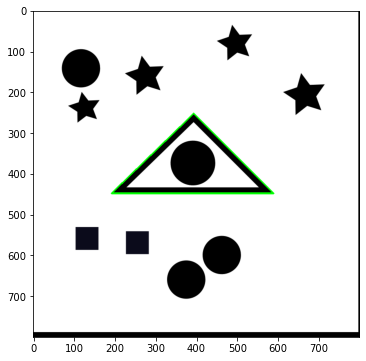

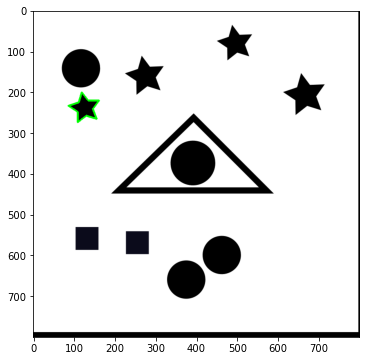

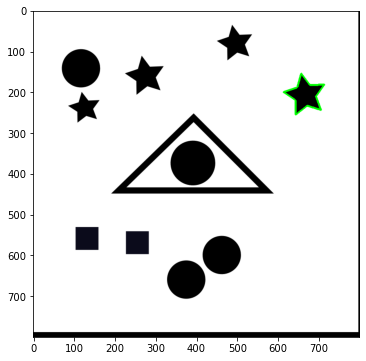

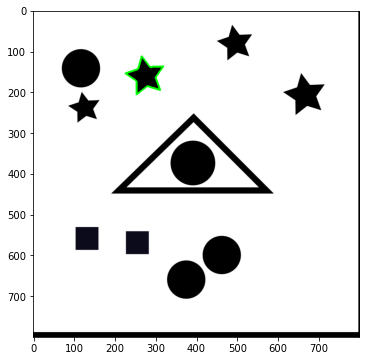

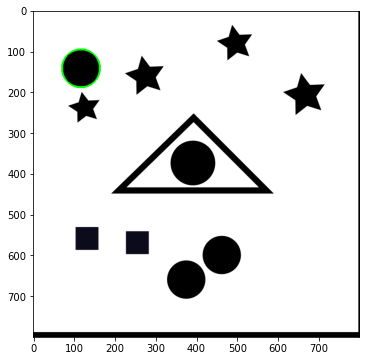

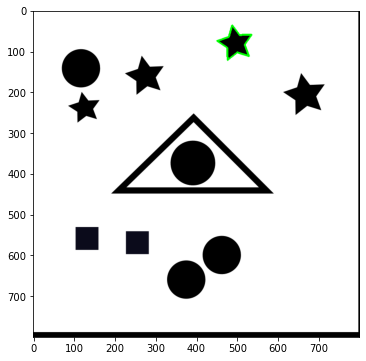

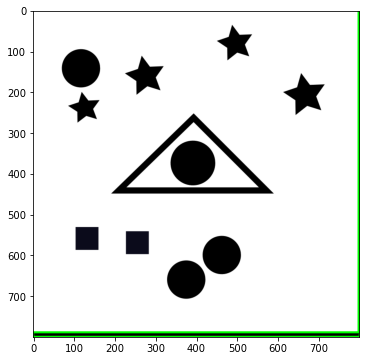

In [15]:
# Agora vamos ver como podemos desenhar os contornos na imagem original.

# Para cada contorno
for cnt in contours: 
    
    # Vamos copiar a imagem (pois desenhar os contornos sobrescreve ela)
    img_copy = img.copy()
    
    # Nota que a cópia não é da imagem onde achamos os contornos, e sim da original.
    # Isso é porque vamos desenhar contornos verdes, para ficar mais claro. 
    
    # Desenhar os contornos em cima
    # Parâmetros:                   Imagem contour ID     cor   espessura
    with_contour = cv2.drawContours(img_copy, [cnt], -1, (0,255, 0), 4)
    
    # Vamos ver como fica:
    plt.figure(figsize=(6, 6))
    plt.imshow(with_contour)
    plt.show()

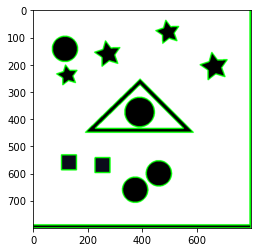

In [16]:
# Podemos fazer todos de uma única vez.
# Como você imaginaria que faríamos isso?

img_copy = img.copy()

with_contour = cv2.drawContours(img_copy, contours, -1, (0,255,0), 4)

# Vamos ver como fica:
plt.imshow(with_contour)
plt.show()


Existe um outro algoritmo que podemos usar antes desse de achar contornos, para facilitar o trabalho, chamado Canny Edges. 

Ele realça mais as fronteiras entre as formas.

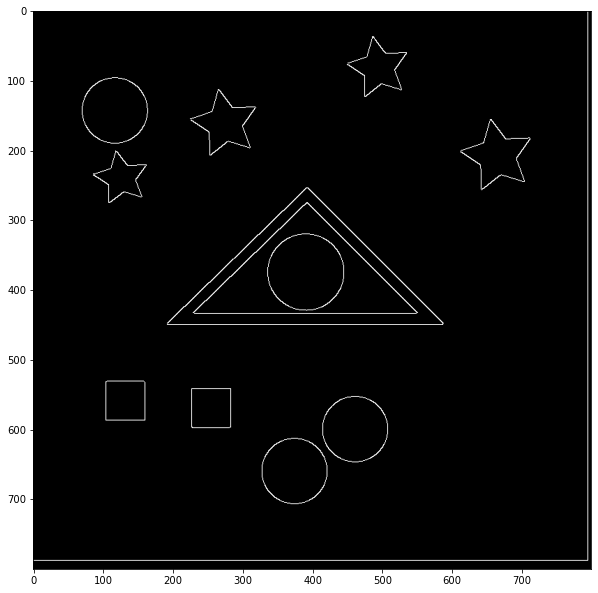

In [17]:
edged = cv2.Canny(img_gray, 60, 100)

plt.figure(figsize=(10, 20))
plt.imshow(edged, cmap='Greys_r')
plt.show()

O Canny já faz as arestas ficarem brancas, em um fundo preto.

In [18]:
contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

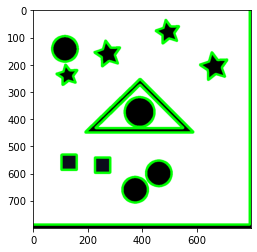

In [19]:
# Desenhe aqui o resultado usando edged.
img_copy = img.copy()

with_contour = cv2.drawContours(img_copy, contours, -1, (0,255,0), 8)

plt.imshow(with_contour)
plt.show()

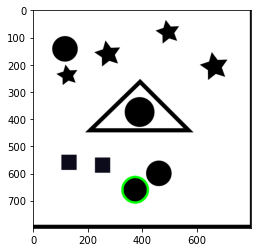

In [20]:
# Desenhe aqui o resultado usando edged.
img_copy = img.copy()

with_contour = cv2.drawContours(img_copy, contours, 0, (0,255,0), 8)

plt.imshow(with_contour)
plt.show()

In [21]:
# Vamos pegar a bolinha de baixo
cnt = contours[0]
retangulo = cv2.boundingRect(cnt)

In [22]:
print(type(retangulo))
print(retangulo)

<class 'tuple'>
(328, 612, 94, 95)


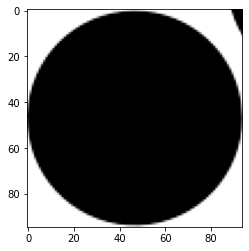

In [23]:
soh_o_circulo = img_gray[612:612+95, 328:328+94].copy()
plt.imshow(soh_o_circulo, cmap='Greys_r')
plt.show()

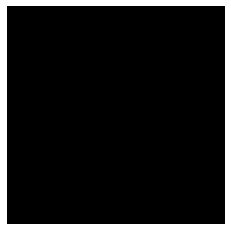

In [24]:
# Desenhe aqui o resultado usando edged.
img_copy = edged.copy()

with_contour = cv2.drawContours(img_copy, contours, -1, (0), 8)

exibe_image(with_contour)